### ECC under finite field

It’s easy to visualize smooth elliptic curves, but what do elliptic curves over a finite field look like?
The following is a plot of `y² = x³ + 3 (mod 23)`

![ECC_under_finite_field](https://static.wixstatic.com/media/935a00_9b8594bdeb9b4eb580847f1d5ffcd6c0~mv2.png)

Here are some plots of y² = x³ + 3 done over modulo 11, 23, 31, and 41 respectively. The higher the modulus, the more points it holds, and the more complex the plot appears to be.

![ECC_1](https://static.wixstatic.com/media/935a00_e592040ff7174e81a1f32ed7ed70a150~mv2.png/v1/fill/w_740,h_397,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/935a00_e592040ff7174e81a1f32ed7ed70a150~mv2.png)

![ECC_2](https://static.wixstatic.com/media/935a00_382bd8455deb45efba13fdb7d77517b4~mv2.png/v1/fill/w_740,h_397,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/935a00_382bd8455deb45efba13fdb7d77517b4~mv2.png)

In the application of cryptography, p needs to be sufficiently large to prevent brute force guessing. In practice, it is over 200 bits.

Here : 

```sh
x = 7 + 4 (mod 11)

11 is the field element
elements in the group : [0,1,2,3,4,5,6,7,8,9,10]
```

#### Cyclic Groups
As discussed previously, a cyclic group is a group such that every element can be computed by starting with a generator element and repeatedly applying the group’s binary operator.
A very simple example is integers modulo 11 under addition. If your generator is 1, and you keep adding the generator to itself, you can generate every element in the group from 0 to 10.
This means we can represent every number in a finite field as an elliptic curve point and add them together just like we would regular integers in a finite field.

```sh
That is,
5 + 7 (mod p) is homomorphic to 5G + 7G
Where G is the generator of the elliptic curve cyclic group. 
```

In [1]:
!pip3 install libnum

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from libnum import has_sqrtmod_prime_power, has_sqrtmod_prime_power, sqrtmod_prime_power

# the functions take arguments
# has_sqrtmod_prime_power(n, field_mod, k), where n**k,
# but we aren't interested in powers in modular fields, so we set k = 1

# check if sqrt(8) mod 11 exists
print(has_sqrtmod_prime_power(8, 11, 1))
# False

# check if sqrt(5) mod 11 exists
print(has_sqrtmod_prime_power(5, 11, 1))
# True

# compute sqrt(5) mod 11
print(list(sqrtmod_prime_power(5, 11, 1)))
# [4, 7]
assert (4 ** 2) % 11 == 5
assert (7 ** 2) % 11 == 5
# we expect 4 and 7 to be inverses of each other, because in "regular" math,
# the two solutions to a square root are sqrt and -sqrt
assert (4 + 7) % 11 == 0

False
True
[4, 7]


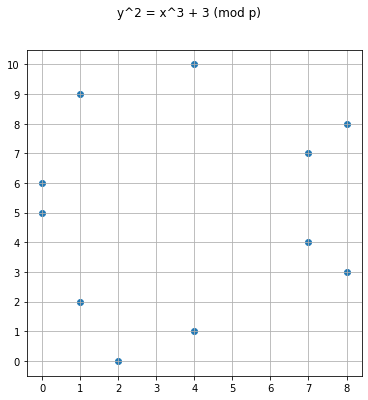

In [4]:
# Generating the plot for ecc in a finite field with field element 11

import libnum
import matplotlib.pyplot as plt

def generate_points(mod):
    xs = []
    ys = []
    def y_squared(x):
        return (x**3 + 3) % mod

    for x in range(0, mod):
        if libnum.has_sqrtmod_prime_power(y_squared(x), mod, 1):
            square_roots = libnum.sqrtmod_prime_power(y_squared(x), mod, 1)

            for sr in square_roots:
                ys.append(sr)
                xs.append(x)
    return xs, ys


xs, ys = generate_points(11)
fig, (ax1) = plt.subplots(1, 1);
fig.suptitle('y^2 = x^3 + 3 (mod p)');
fig.set_size_inches(6, 6);
ax1.set_xticks(range(0,11));
ax1.set_yticks(range(0,11));
plt.grid()
plt.scatter(xs, ys)

In [5]:
# ===================================================
# Point Addition on curve
# ===================================================

def double(x, y, a, p):
    lambd = (((3 * x**2) % p ) *  pow(2 * y, -1, p)) % p
    newx = (lambd**2 - 2 * x) % p
    newy = (-lambd * newx + lambd * x - y) % p
    return (newx, newy)

def add_points(xq, yq, xp, yp, p, a=0):
    if xq == yq == None:
        return xp, yp
    if xp == yp == None:
        return xq, yq
    
    assert (xq**3 + 3) % p == (yq ** 2) % p, "q not on curve"
    assert (xp**3 + 3) % p == (yp ** 2) % p, "p not on curve"
    
    if xq == xp and yq == yp:
        return double(xq, yq, a, p)
    elif xq == xp:
        return None, None
    
    lambd = ((yq - yp) * pow((xq - xp), -1, p) ) % p
    xr = (lambd**2 - xp - xq) % p
    yr = (lambd*(xp - xr) - yp) % p
    return xr, yr

#### Every elliptic curve point in a cyclic group has a “number”
A cyclic group, by definition, can be generated by repeatedly adding the generator to itself.

Let’s use a real example of y² = x³ + 3 (mod 11) with the generator point being (4, 10).

Using the python functions above, we can start with the point (4, 10) and generate every point in the group:

In [6]:
# for our purposes, (4, 10) is the generator point G
next_x, next_y = 4, 10
print(1, 4, 10)
points = [(next_x, next_y)]
for i in range(2, 12):
    # repeatedly add G to the next point to generate all the elements
    next_x, next_y = add_points(next_x, next_y, 4, 10, 11)
    print(i, next_x, next_y)
    points.append((next_x, next_y))

1 4 10
2 7 7
3 1 9
4 0 6
5 8 8
6 2 0
7 8 3
8 0 5
9 1 2
10 7 4
11 4 1


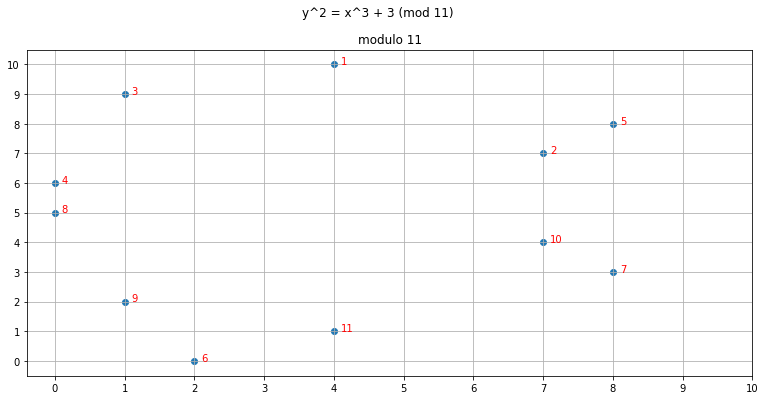

In [7]:
xs11, ys11 = generate_points(11)

fig, (ax1) = plt.subplots(1, 1);
fig.suptitle('y^2 = x^3 + 3 (mod 11)');
fig.set_size_inches(13, 6);

ax1.set_title("modulo 11")
ax1.scatter(xs11, ys11, marker='o');
ax1.set_xticks(range(0,11));
ax1.set_yticks(range(0,11));
ax1.grid()

for i in range(0, 11):
    plt.annotate(str(i+1), (points[i][0] + 0.1, points[i][1]), color="red");